In [1]:
cd C:/Users/karvo/Desktop/aueb/marketing-sales/exercise 2

C:\Users\karvo\Desktop\aueb\marketing-sales\exercise 2


In [220]:
import pandas as pd
import numpy as np
import time
data = pd.read_csv('dataz.csv')
data.Gender=data.Gender.astype('category')
data.Job_Type=data.Job_Type.astype('category')
data.Handset_Brand=data.Handset_Brand.astype('category')
data.Handset_Brand=data.Handset_Brand.fillna('UNRECOGNIZED')

In [221]:
data.shape

(132648, 25)

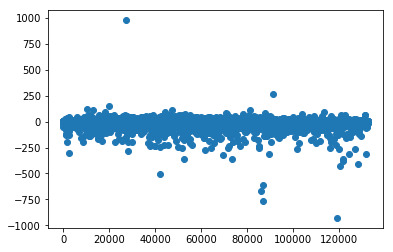

In [3]:
auxil=data.Avg_Total_Out_Calls-(data.Avg_Voice_Out_Calls+data.Avg_Data_Out_Calls+data.Avg_SMS_Out_Calls)
#auxil=data.Avg_Voice_Out_Calls-(data.Avg_OffNet_Out_Calls+data.Avg_OnNet_Out_Calls+data.Avg_Fixed_Out_Calls)
#auxil=data.Avg_Voice_Out_Calls-(data.Avg_OffNet_Out_Calls+data.Avg_OnNet_Out_Calls+data.Avg_International_Out_Calls+data.Avg_Fixed_Out_Calls+data.Avg_Roaming_Out_Calls)
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x=list(auxil.index),y=list(auxil))


In [60]:
data.dtypes

Customer_ID                       int64
Age                             float64
Gender                         category
Job_Type                       category
Tenure                            int64
Handset_Brand                  category
Handset_TechRank                  int64
Avg_Total_Out_Calls             float64
Avg_Voice_Out_Calls             float64
Avg_Voice_Out_Minutes           float64
Avg_SMS_Out_Calls               float64
Avg_Internet_Out_Volume         float64
Avg_Data_Out_Calls              float64
Avg_OnNet_Out_Calls             float64
Avg_OffNet_Out_Calls            float64
Avg_Fixed_Out_Calls             float64
Avg_International_Out_Calls     float64
Avg_Roaming_Out_Calls           float64
Avg_Voice_Inc_Calls             float64
Avg_Voice_Inc_Minutes           float64
Avg_Total_Out_Community         float64
Avg_Voice_Out_Community         float64
Avg_Voice_Inc_Community         float64
Avg_SMS_Out_Community           float64
ARPU                            float64


In [145]:
data.Avg_Total_Out_Calls[3]

26.0

In [109]:
from sklearn.cluster import KMeans
aux=data[['ARPU','Avg_Total_Out_Calls']]
kmeans=KMeans(n_clusters=10)
kmeans.fit(aux)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# PCA

In [22]:
aux=data.ix[:,7:24]
aux.head()

,Avg_Total_Out_Calls,Avg_Voice_Out_Calls,Avg_Voice_Out_Minutes,Avg_SMS_Out_Calls,Avg_Internet_Out_Volume,Avg_Data_Out_Calls,Avg_OnNet_Out_Calls,Avg_OffNet_Out_Calls,Avg_Fixed_Out_Calls,Avg_International_Out_Calls,Avg_Roaming_Out_Calls,Avg_Voice_Inc_Calls,Avg_Voice_Inc_Minutes,Avg_Total_Out_Community,Avg_Voice_Out_Community,Avg_Voice_Inc_Community,Avg_SMS_Out_Community
0,266.500000,263.166667,14997.500000,3.333333,0.0,0.000000,166.500000,58.666667,35.333333,0.0,0.0,123.333333,7578.666667,38.500000,38.333333,34.333333,1.000000
1,93.500000,86.000000,6543.833333,7.500000,0.0,0.166667,6.666667,70.666667,8.333333,0.0,0.0,93.166667,4062.833333,24.666667,23.666667,22.500000,3.500000
2,132.333333,129.166667,6125.000000,3.166667,0.0,0.000000,69.833333,43.333333,16.000000,0.0,0.0,84.333333,3508.833333,37.000000,35.666667,25.666667,2.666667
3,26.000000,20.666667,2824.833333,5.333333,0.0,0.000000,13.000000,6.333333,1.333333,0.0,0.0,18.500000,2819.833333,8.666667,8.000000,9.500000,3.000000
4,175.166667,119.000000,10404.000000,55.500000,0.0,2.666667,41.500000,71.333333,2.333333,0.0,0.0,20.166667,1006.833333,21.000000,18.333333,8.666667,6.500000


In [25]:
from sklearn import decomposition
from sklearn.preprocessing import scale
aux=scale(aux)
pca=decomposition.PCA(n_components='mle',svd_solver='full')
pca.fit(aux)

PCA(copy=True, iterated_power='auto', n_components='mle', random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [28]:
from rpy2.robjects import r

ModuleNotFoundError: No module named 'rpy2'

In [27]:
pca

PCA(copy=True, iterated_power='auto', n_components='mle', random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [14]:
var= pca.explained_variance_ratio_
var

array([  4.58224865e-01,   1.12949728e-01,   7.24122981e-02,
         6.74638978e-02,   5.85419428e-02,   4.49141613e-02,
         4.16248736e-02,   3.99685720e-02,   3.08491295e-02,
         2.80278233e-02,   1.94749144e-02,   1.24366812e-02,
         9.54788346e-03,   3.06735903e-03,   3.27645352e-04,
         1.33299868e-04])

In [15]:
pca.components_

array([[  3.19624267e-01,   3.38163684e-01,   2.99108581e-01,
          1.18822063e-01,   2.17647027e-02,   6.24108455e-02,
          2.65288553e-01,   2.80858843e-01,   2.24520002e-01,
          6.99915827e-02,   5.93694316e-02,   3.05984449e-01,
          2.70089883e-01,   3.24676034e-01,   3.18924594e-01,
          2.67914048e-01,   1.48186811e-01],
       [  2.43360566e-01,  -6.95863378e-02,  -1.16642671e-02,
          5.89426872e-01,   1.89279973e-01,   3.36300137e-01,
          1.26343783e-03,  -3.66786211e-02,  -2.71135162e-01,
          4.60938595e-03,   1.84020451e-01,  -1.00461129e-01,
         -2.55914972e-02,  -7.29606040e-02,  -1.69591642e-01,
         -1.71453003e-01,   5.06433172e-01],
       [  3.28666319e-03,   4.93872937e-02,   4.87839208e-02,
         -1.15858913e-01,   4.48137278e-01,   4.15142982e-01,
          1.18507839e-01,   1.19156883e-01,   1.00466140e-01,
         -4.65454190e-01,  -5.59585904e-01,  -6.47018535e-02,
         -1.14258726e-01,   2.10124223e-02

In [299]:
pca.explained_var

array([  7.78982271e+00,   1.92014538e+00,   1.23100907e+00,
         1.14688626e+00,   9.95213028e-01,   7.63540742e-01,
         7.07622850e-01,   6.79465724e-01,   5.24435201e-01,
         4.76472996e-01,   3.31073545e-01,   2.11423581e-01,
         1.62314019e-01,   5.21451035e-02,   5.56997098e-03,
         2.26609776e-03])

In [294]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

array([ 45.82,  57.11,  64.35,  71.1 ,  76.95,  81.44,  85.6 ,  89.6 ,
        92.68,  95.48,  97.43,  98.67,  99.62,  99.93,  99.96,  99.97])

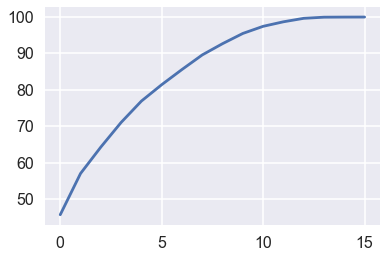

In [295]:
plt.plot(var1)

In [309]:
pca=decomposition.PCA(n_components=10)
#pca.fit(aux)
aux=pca.fit_transform(aux)
aux=pd.DataFrame(aux)
aux.head()

,0,1,2,3,4,5,6,7,8,9
0,1.428189,-0.806613,0.543415,-0.085462,-1.151505,0.380602,1.190514,0.301884,-1.316947,-0.675577
1,-1.374288,-0.238599,0.040708,-0.169707,0.028561,0.058863,0.005050,0.081219,0.858855,-0.080682
2,-0.584178,-0.516179,0.193575,-0.094775,-0.393118,0.048031,0.078832,0.081665,-0.281529,-0.741220
3,-3.021404,0.051345,-0.113134,-0.098092,0.081935,0.193996,0.256637,0.078652,-0.024055,0.041744
4,-1.186715,1.095178,0.648682,0.051069,-0.769447,0.345802,0.516960,-0.527310,0.599603,-0.193223


# clustering on PCA

In [311]:
kmeans=cluster.KMeans(n_clusters=6)
kmeans.fit(aux)

1098232.381635234

In [313]:
kmeans.cluster_centers_

array([[ -2.15887861e+00,  -1.09729837e-01,  -3.62903427e-02,
          7.73904045e-02,  -6.07836495e-02,   1.87670685e-03,
          5.45385220e-02,   1.57798397e-03,  -2.58807092e-03,
          6.76960681e-02],
       [  3.56875108e+00,  -7.00629263e-01,   1.24329660e-01,
         -1.08586847e-01,   1.03059147e-01,  -2.91050560e-02,
          8.42001069e-02,   3.33616157e-02,   1.85933606e-02,
         -4.93418895e-02],
       [  1.49880304e-01,  -1.52282642e-01,   2.25580415e-02,
         -7.27083128e-02,   4.01015945e-02,   7.14936658e-03,
         -2.82757300e-02,   1.02683249e-02,   1.21242945e-02,
         -1.05326589e-01],
       [  1.03878934e+01,  -1.36021358e+00,   3.47072812e-01,
          1.39785201e-02,  -2.93947613e-01,  -1.15596748e-01,
          2.43202919e-01,   6.00157292e-02,  -1.14260226e-02,
          2.72475382e-01],
       [  2.20133420e+00,   3.37222517e+00,   3.78106332e-01,
         -4.12032655e-01,   1.50273777e-01,   7.92271350e-02,
         -5.45918208e-01

In [318]:
kmeans.labels_

array([2, 0, 2, ..., 3, 1, 0])

In [324]:
from sklearn import mixture
gmm=mixture.GaussianMixture(n_components=6,covariance_type='diag')
gmm.fit(aux)
gmm.predict(aux)

array([0, 1, 5, ..., 2, 0, 1], dtype=int64)

In [325]:
#aux['cluster']=gmm.predict(aux)
data2=data
data2['cluster']=gmm.predict(aux)

In [326]:
data.groupby('cluster').mean()

,Customer_ID,Age,Tenure,Handset_TechRank,Avg_Total_Out_Calls,Avg_Voice_Out_Calls,Avg_Voice_Out_Minutes,Avg_SMS_Out_Calls,Avg_Internet_Out_Volume,Avg_Data_Out_Calls,...,Avg_Fixed_Out_Calls,Avg_International_Out_Calls,Avg_Roaming_Out_Calls,Avg_Voice_Inc_Calls,Avg_Voice_Inc_Minutes,Avg_Total_Out_Community,Avg_Voice_Out_Community,Avg_Voice_Inc_Community,Avg_SMS_Out_Community,ARPU
cluster,,,,,,,,,,,,,,,,,,,,,
0,63387.360576,36.399754,40.340551,3.280242,291.518283,243.279732,18746.068359,47.252243,61.801227,0.724632,...,43.896031,0.910240,2.513589,213.825167,16849.833882,53.123665,50.015816,60.570587,8.530535,91.817426
1,67198.638510,45.388922,32.831761,2.603205,59.020040,53.220658,3782.788642,5.476781,6.531164,0.043744,...,13.311648,0.096641,0.312668,42.097829,2939.694443,16.546302,15.714087,14.976024,1.693860,26.821860
2,58443.100236,37.747214,48.667192,3.406262,585.032001,417.696436,35069.637718,165.764212,94.350212,1.207168,...,79.799921,1.499836,5.130793,363.388079,29416.701753,81.606046,75.040994,101.527734,15.146252,167.179173
3,69072.892580,38.253071,29.285642,3.264369,168.346321,95.959224,7364.807367,73.134375,89.188063,0.935209,...,13.985474,0.808921,3.195000,89.636580,7539.510453,27.645853,22.226288,26.350953,11.109212,53.545018
4,61496.447469,37.176310,41.325305,3.530541,349.624840,241.394415,21032.926643,126.865445,1014.272096,6.799942,...,36.561140,13.715416,42.789471,169.321990,14988.029552,50.394241,44.548691,51.155032,12.372019,159.495396
5,67270.230429,38.241760,33.564913,3.046630,147.275592,133.406238,9328.691834,13.196296,20.624334,0.203589,...,27.835791,0.282150,0.831105,113.410650,8225.276187,34.089028,32.567775,34.977553,3.905823,48.685644


# Testing methods

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
aux=data[['Avg_Voice_Out_Minutes','Avg_Total_Out_Calls']]
#aux.ix[:,0]=aux.Job_Type.cat.codes
#plt.scatter(aux.ix[:,0],aux.ix[:,1])

In [7]:
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
import seaborn as sns
sns.set_context('poster')
sns.set_color_codes()
from sklearn import cluster
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    rauf=algorithm(*args, **kwds).fit(data)
    labels = rauf.predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.ix[:,0], data.ix[:,1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

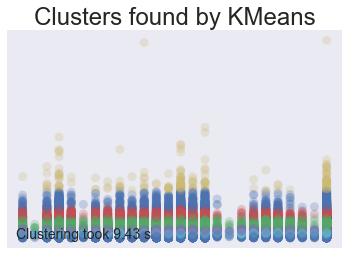

In [152]:
plot_clusters(aux, cluster.KMeans, (), {'n_clusters':8})

In [153]:
plot_clusters(aux, cluster.DBSCAN, (), {'eps':0.025})

AttributeError: 'DBSCAN' object has no attribute 'predict'

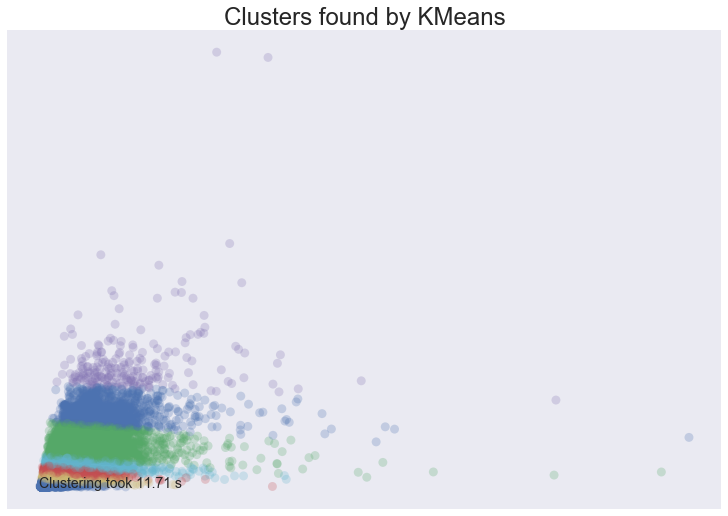

In [129]:
plot_clusters(aux, KMeans, (), {'n_clusters':8})

In [27]:
from sklearn import mixture
gmm=mixture.GaussianMixture(n_components=3,covariance_type='diag')
gmm.fit(aux)
gmm.predict(aux)

array([1, 0, 0, ..., 2, 2, 0], dtype=int64)

In [28]:
gmm.covariances_

array([[  5.91259038e+06,   1.71392779e+03],
       [  2.00781508e+07,   4.50296673e+03],
       [  2.88666020e+08,   4.16244507e+04]])

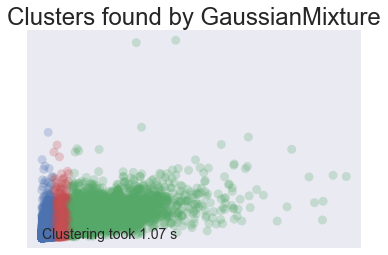

In [12]:
plot_clusters(aux,mixture.GaussianMixture, (), {'n_components':3,'covariance_type':'spherical'})

# value-based segmentation

In [3]:
bronze_thr=np.percentile(data.ARPU,60)
silver_thr=np.percentile(data.ARPU,85)
gold_thr=np.percentile(data.ARPU,96)
platinum_thr=np.percentile(data.ARPU,99)
data['value_label']='core'
data.loc[data['ARPU']>=bronze_thr,'value_label']='bronze'
data.loc[data['ARPU']>=silver_thr,'value_label']='silver'
data.loc[data['ARPU']>=gold_thr,'value_label']='gold'
data.loc[data['ARPU']>=platinum_thr,'value_label']='platinum'

# Clustering

In [225]:
cd C:/Users/karvo/Desktop/aueb/marketing-sales/exercise 2

C:\Users\karvo\Desktop\aueb\marketing-sales\exercise 2


In [226]:
import pandas as pd
import numpy as np
import time
data = pd.read_csv('pca-data.csv')
new_data=pd.read_csv('new_data.csv')

In [227]:
aux = pd.read_csv('dataz.csv')
aux.Gender=aux.Gender.astype('category')
aux.Job_Type=aux.Job_Type.astype('category')
aux.Handset_Brand=aux.Handset_Brand.astype('category')
aux.Handset_Brand=aux.Handset_Brand.fillna('UNRECOGNIZED')
aux.head()

,Customer_ID,Age,Gender,Job_Type,Tenure,Handset_Brand,Handset_TechRank,Avg_Total_Out_Calls,Avg_Voice_Out_Calls,Avg_Voice_Out_Minutes,...,Avg_Fixed_Out_Calls,Avg_International_Out_Calls,Avg_Roaming_Out_Calls,Avg_Voice_Inc_Calls,Avg_Voice_Inc_Minutes,Avg_Total_Out_Community,Avg_Voice_Out_Community,Avg_Voice_Inc_Community,Avg_SMS_Out_Community,ARPU
0,1,3.0,F,Pensioners,29,NOKIA,4,266.500000,263.166667,14997.500000,...,35.333333,0.0,0.0,123.333333,7578.666667,38.500000,38.333333,34.333333,1.000000,43.405467
1,2,24.0,M,Various Professionals,11,SONY ERICSSON,4,93.500000,86.000000,6543.833333,...,8.333333,0.0,0.0,93.166667,4062.833333,24.666667,23.666667,22.500000,3.500000,36.405722
2,3,52.0,M,Public Sector Employees,11,NOKIA,4,132.333333,129.166667,6125.000000,...,16.000000,0.0,0.0,84.333333,3508.833333,37.000000,35.666667,25.666667,2.666667,27.562444
3,4,NaN,F,Housekeeping,29,SIEMENS,3,26.000000,20.666667,2824.833333,...,1.333333,0.0,0.0,18.500000,2819.833333,8.666667,8.000000,9.500000,3.000000,21.806811
4,5,33.0,M,Various Professionals,8,SAMSUNG,4,175.166667,119.000000,10404.000000,...,2.333333,0.0,0.0,20.166667,1006.833333,21.000000,18.333333,8.666667,6.500000,45.733278


In [228]:
aux=aux.loc[aux['Avg_Total_Out_Calls']>10.6]
bronze_thr=np.percentile(aux.ARPU,60)
silver_thr=np.percentile(aux.ARPU,85)
gold_thr=np.percentile(aux.ARPU,96)
platinum_thr=np.percentile(aux.ARPU,99)
aux['value_label']='core'
aux.loc[aux['ARPU']>=bronze_thr,'value_label']='bronze'
aux.loc[aux['ARPU']>=silver_thr,'value_label']='silver'
aux.loc[aux['ARPU']>=gold_thr,'value_label']='gold'
aux.loc[aux['ARPU']>=platinum_thr,'value_label']='platinum'
value_labels=aux.value_label
aux=aux.ix[:,2:7]
aux.head()

,Gender,Job_Type,Tenure,Handset_Brand,Handset_TechRank
0,F,Pensioners,29,NOKIA,4
1,M,Various Professionals,11,SONY ERICSSON,4
2,M,Public Sector Employees,11,NOKIA,4
3,F,Housekeeping,29,SIEMENS,3
4,M,Various Professionals,8,SAMSUNG,4


In [214]:
aux.shape[0]

130042

In [219]:
aux.value_label.value_counts(normalize=True)*100

core        59.999846
bronze      24.999616
silver      11.000292
gold         2.999800
platinum     1.000446
Name: value_label, dtype: float64

In [210]:
aux.groupby('value_label').ARPU.sum()/aux.ARPU.sum()

value_label
bronze      0.294622
core        0.329380
gold        0.096873
platinum    0.060547
silver      0.218579
Name: ARPU, dtype: float64

To 40% toy plithismou paragei to 68% tou ploutou- ARPU ths etairias

In [229]:
import numpy as np
#dataset=pd.concat([aux,new_data],axis=1)
#dataset.head()
df = pd.concat([aux.reset_index(drop=True), new_data], axis=1)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.Gender=le.fit_transform(df.Gender)
df.Job_Type=le.fit_transform(df.Job_Type)
df.Handset_Brand=le.fit_transform(df.Handset_Brand)
df.head()

,Gender,Job_Type,Tenure,Handset_Brand,Handset_TechRank,Avg_Total_Out_Calls,Avg_Voice_Out_Calls,Avg_Voice_Out_Minutes,Avg_SMS_Out_Calls,Avg_Internet_Out_Volume,...,Avg_Total_Out_Community,Avg_Voice_Out_Community,Avg_Voice_Inc_Community,Avg_SMS_Out_Community,Voice_affinity,sms_affinity,data_affinity,fixed_affinity,abroad_affinity,in_out_ratio
0,0,11,29,14,4,266.500000,263.166667,14997.500000,3.333333,0.0,...,38.500000,38.333333,34.333333,1.000000,0.987492,0.012508,0.000000,0.134262,0.0,0.680897
1,1,25,11,23,4,93.500000,86.000000,6543.833333,7.500000,0.0,...,24.666667,23.666667,22.500000,3.500000,0.919786,0.080214,0.001783,0.096899,0.0,0.480000
2,1,15,11,14,4,132.333333,129.166667,6125.000000,3.166667,0.0,...,37.000000,35.666667,25.666667,2.666667,0.976071,0.023929,0.000000,0.123871,0.0,0.604996
3,0,8,29,21,3,26.000000,20.666667,2824.833333,5.333333,0.0,...,8.666667,8.000000,9.500000,3.000000,0.794872,0.205128,0.000000,0.064516,0.0,0.527660
4,1,25,8,18,4,175.166667,119.000000,10404.000000,55.500000,0.0,...,21.000000,18.333333,8.666667,6.500000,0.679353,0.316841,0.015224,0.019608,0.0,0.855090


# centroids

In [5]:
from sklearn.cluster import AgglomerativeClustering,DBSCAN,KMeans
from sklearn import mixture
kmeans1=KMeans(n_clusters=4)
kmeans2=KMeans(n_clusters=5)
kmeans3=KMeans(n_clusters=6)
kmeans4=KMeans(n_clusters=7)
kmeans5=KMeans(n_clusters=8)
kmeans6=KMeans(n_clusters=9)
kmeans1.fit(data)
kmeans2.fit(data)
kmeans3.fit(data)
kmeans4.fit(data)
kmeans5.fit(data)
kmeans6.fit(data)
labs1=kmeans1.labels_
labs2=kmeans2.labels_
labs3=kmeans3.labels_
labs4=kmeans4.labels_
labs5=kmeans5.labels_
labs6=kmeans6.labels_

In [6]:
from sklearn import metrics
ss=10000
metrics.silhouette_score(data, labs1,sample_size=ss),metrics.silhouette_score(data, labs2,sample_size=ss),metrics.silhouette_score(data, labs3,sample_size=ss),metrics.silhouette_score(data, labs4,sample_size=ss),metrics.silhouette_score(data,labs5,sample_size=ss),metrics.silhouette_score(data,labs6,sample_size=ss)

(0.20884149351897605,
 0.2195915294707817,
 0.22027335347654078,
 0.20056639636134135,
 0.20742018213163019,
 0.18155076864718711)

In [8]:
from collections import Counter
Counter(labs1),Counter(labs2),Counter(labs3),Counter(labs4),Counter(labs5),Counter(labs6)

(Counter({0: 70374, 1: 35566, 2: 20904, 3: 3198}),
 Counter({0: 20332, 1: 69153, 2: 35275, 3: 2119, 4: 3163}),
 Counter({0: 13659, 1: 61232, 2: 31214, 3: 2018, 4: 19049, 5: 2870}),
 Counter({0: 26295, 1: 17221, 2: 26197, 3: 46731, 4: 8965, 5: 2734, 6: 1899}),
 Counter({0: 16863,
          1: 46213,
          2: 2716,
          3: 8696,
          4: 25824,
          5: 3563,
          6: 25959,
          7: 208}),
 Counter({0: 36711,
          1: 24509,
          2: 207,
          3: 7076,
          4: 3453,
          5: 16066,
          6: 30909,
          7: 8481,
          8: 2630}))

# distribution

In [9]:
from sklearn import mixture
gmm=mixture.GaussianMixture(n_components=4,covariance_type='tied')
gmm.fit(data)
gm_labs=gmm.predict(data)
gmm=mixture.GaussianMixture(n_components=5,covariance_type='tied')
gmm.fit(data)
gm_labs2=gmm.predict(data)
gmm=mixture.GaussianMixture(n_components=6,covariance_type='tied')
gmm.fit(data)
gm_labs3=gmm.predict(data)
gmm=mixture.GaussianMixture(n_components=7,covariance_type='tied')
gmm.fit(data)
gm_labs4=gmm.predict(data)
gmm=mixture.GaussianMixture(n_components=8,covariance_type='tied')
gmm.fit(data)
gm_labs5=gmm.predict(data)
gmm=mixture.GaussianMixture(n_components=9,covariance_type='tied')
gmm.fit(data)
gm_labs6=gmm.predict(data)
ss=10000
metrics.silhouette_score(data,gm_labs,sample_size=ss),metrics.silhouette_score(data,gm_labs2,sample_size=ss),metrics.silhouette_score(data,gm_labs3,sample_size=ss),metrics.silhouette_score(data,gm_labs4,sample_size=ss),metrics.silhouette_score(data,gm_labs5,sample_size=ss),metrics.silhouette_score(data,gm_labs6,sample_size=ss)

(0.26169820165717916,
 0.23440894270586213,
 0.2792399553735696,
 0.24131323906838564,
 0.16655731491428297,
 0.17683043647175961)

In [10]:
Counter(gm_labs),Counter(gm_labs2),Counter(gm_labs3),Counter(gm_labs4),Counter(gm_labs5),Counter(gm_labs6)

(Counter({0: 12352, 1: 2467, 2: 13572, 3: 101651}),
 Counter({0: 13790, 1: 1210, 2: 11596, 3: 3742, 4: 99704}),
 Counter({0: 12049, 1: 12668, 2: 2450, 3: 19, 4: 100933, 5: 1923}),
 Counter({0: 13186, 1: 11295, 2: 3810, 3: 95018, 4: 1189, 5: 3154, 6: 2390}),
 Counter({0: 11835,
          1: 85517,
          2: 10889,
          3: 2218,
          4: 2633,
          5: 1188,
          6: 13386,
          7: 2376}),
 Counter({0: 2219,
          1: 11796,
          2: 12920,
          3: 2530,
          4: 2371,
          5: 85550,
          6: 2477,
          7: 85,
          8: 10094}))

# Hierarchical

In [13]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
knn_graph = kneighbors_graph(data, 45, include_self=False)

In [101]:
ag=AgglomerativeClustering(connectivity=knn_graph,linkage='ward',n_clusters=6)
ag_labels=ag.fit_predict(data)
ag=AgglomerativeClustering(connectivity=knn_graph,linkage='average',n_clusters=6)
ag_labels2=ag.fit_predict(data)
#ag=AgglomerativeClustering(connectivity=knn_graph,linkage='complete',n_clusters=4)
#ag_labels3=ag.fit_predict(data)
#metrics.silhouette_score(data,ag_labels,sample_size=ss),metrics.silhouette_score(data,ag_labels2,sample_size=ss),metrics.silhouette_score(data,ag_labels3,sample_size=ss)

In [102]:
Counter(ag_labels),Counter(ag_labels2)

(Counter({0: 66076, 1: 4479, 2: 9190, 3: 26057, 4: 15933, 5: 8307}),
 Counter({0: 9, 1: 130028, 2: 2, 3: 1, 4: 1, 5: 1}))

In [14]:
ag=AgglomerativeClustering(connectivity=knn_graph,linkage='ward',n_clusters=3)
ag_labels=ag.fit_predict(data)
ag=AgglomerativeClustering(connectivity=knn_graph,linkage='ward',n_clusters=4)
ag_labels2=ag.fit_predict(data)
ag=AgglomerativeClustering(connectivity=knn_graph,linkage='ward',n_clusters=5)
ag_labels3=ag.fit_predict(data)
ag=AgglomerativeClustering(connectivity=knn_graph,linkage='ward',n_clusters=6)
ag_labels4=ag.fit_predict(data)
ag=AgglomerativeClustering(connectivity=knn_graph,linkage='ward',n_clusters=7)
ag_labels5=ag.fit_predict(data)
ag=AgglomerativeClustering(connectivity=knn_graph,linkage='ward',n_clusters=8)
ag_labels6=ag.fit_predict(data)

In [15]:
metrics.silhouette_score(data,ag_labels,sample_size=ss),metrics.silhouette_score(data,ag_labels2,sample_size=ss),metrics.silhouette_score(data,ag_labels3,sample_size=ss),metrics.silhouette_score(data,ag_labels4,sample_size=ss),metrics.silhouette_score(data,ag_labels5,sample_size=ss),metrics.silhouette_score(data,ag_labels6,sample_size=ss)
#metrics.silhouette_score(data,ag_labels4,sample_size=ss),metrics.silhouette_score(data,ag_labels4,sample_size=ss)
#metrics.silhouette_score(data,ag_labels5,sample_size=ss)#,metrics.silhouette_score(data,ag_labels6,sample_size=ss)

(0.18269774145014317,
 0.1670846589917824,
 0.1397668702107947,
 0.15151540383076945,
 0.13528040961229532,
 0.14450877691776387)

In [16]:
from collections import Counter
Counter(ag_labels),Counter(ag_labels2),Counter(ag_labels3),Counter(ag_labels4),Counter(ag_labels5),Counter(ag_labels6)

(Counter({0: 30536, 1: 90316, 2: 9190}),
 Counter({0: 90316, 1: 4479, 2: 9190, 3: 26057}),
 Counter({0: 74383, 1: 4479, 2: 9190, 3: 26057, 4: 15933}),
 Counter({0: 66076, 1: 4479, 2: 9190, 3: 26057, 4: 15933, 5: 8307}),
 Counter({0: 9190, 1: 4479, 2: 45920, 3: 26057, 4: 15933, 5: 8307, 6: 20156}),
 Counter({0: 4479,
          1: 26057,
          2: 45920,
          3: 8340,
          4: 15933,
          5: 8307,
          6: 20156,
          7: 850}))

# Density

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
X = StandardScaler().fit_transform(data)
db = DBSCAN(eps=.1, min_samples=7000,algorithm='kd_tree').fit(X)
db_labs=db.labels_
Counter(db_labs)

Counter({-1: 130042})

In [17]:
from collections import Counter
from sklearn import metrics
Counter(db_labs)

Counter({-1: 130042})

In [24]:
import hdbscan
from sklearn.metrics import pairwise_distances
#from sklearn.neighbors import kneighbors_graph
#knn_graph = kneighbors_graph(data, 45, include_self=False)
db = hdbscan.HDBSCAN(metric='precomputed',min_cluster_size=15)
db_labs = db.fit_predict(data)
ss=10000
metrics.silhouette_score(data,db_labs,sample_size=ss),Counter(cluster_labels)
#hierarchy = clusterer.cluster_hierarchy_
#alt_labels = hierarchy.get_clusters(0.100, 5)
#hierarchy.plot()

(0.13614753119966527, Counter({-1: 7, 0: 130029, 1: 6}))

# Supervised

In [129]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import classification_report
lr=LR()
lr.fit(df,labs2)
pred=lr.predict(df)
lr=LR()
lr.fit(df,labs3)
pred_2=lr.predict(df)
lr=LR()
lr.fit(df,gm_labs)
pred_3=lr.predict(df)
lr=LR()
lr.fit(df,gm_labs3)
pred_4=lr.predict(df)
lr=LR()
lr.fit(df,gm_labs4)
pred_5=lr.predict(df)
lr=LR()
lr.fit(df,ag_labels2)
pred_6=lr.predict(df)
lr=LR()
lr.fit(df,ag_labels4)
pred_7=lr.predict(df)
print('kmeans: 5')
print(classification_report(pred,labs2))
print('kmeans: 6')
print(classification_report(pred_2,labs3))
print('gmm:4')
print(classification_report(pred_3,gm_labs))
print('gmm:6')
print(classification_report(pred_4,gm_labs3))
print('gmm:7')
print(classification_report(pred_5,gm_labs4))
print('hierarchical:4')
print(classification_report(pred_6,ag_labels2))
print('hierarchical:6')
print(classification_report(pred_7,ag_labels4))

kmeans: 5
             precision    recall  f1-score   support

          0       0.92      0.96      0.94     19563
          1       0.97      0.95      0.96     70777
          2       0.94      0.96      0.95     34817
          3       0.80      0.88      0.83      1918
          4       0.84      0.89      0.87      2967

avg / total       0.95      0.95      0.95    130042

kmeans: 6
             precision    recall  f1-score   support

          0       0.76      0.86      0.81     12127
          1       0.96      0.88      0.92     67355
          2       0.85      0.95      0.90     27737
          3       0.79      0.87      0.83      1828
          4       0.90      0.94      0.92     18210
          5       0.86      0.89      0.87      2785

avg / total       0.91      0.90      0.90    130042

gmm:4
             precision    recall  f1-score   support

          0       0.71      0.85      0.77     10266
          1       0.78      0.87      0.82      2212
          2  

In [158]:
df['kmeans_clusters']=labs2
df['kmeans_clusters_6']=labs3
df['gmm_clusters_4']=gm_labs
df['gmm_clusters_6']=gm_labs3
df['hierarch_4']=ag_labels2
df['hierarch_6']=ag_labels4
df['gmm_clusters_7']=gm_labs4

In [140]:
df.columns

Index(['Gender', 'Job_Type', 'Tenure', 'Handset_Brand', 'Handset_TechRank',
       'Avg_Total_Out_Calls', 'Avg_Voice_Out_Calls', 'Avg_Voice_Out_Minutes',
       'Avg_SMS_Out_Calls', 'Avg_Internet_Out_Volume', 'Avg_Data_Out_Calls',
       'Avg_OnNet_Out_Calls', 'Avg_OffNet_Out_Calls', 'Avg_Fixed_Out_Calls',
       'Avg_International_Out_Calls', 'Avg_Roaming_Out_Calls',
       'Avg_Voice_Inc_Calls', 'Avg_Voice_Inc_Minutes',
       'Avg_Total_Out_Community', 'Avg_Voice_Out_Community',
       'Avg_Voice_Inc_Community', 'Avg_SMS_Out_Community', 'Voice_affinity',
       'sms_affinity', 'data_affinity', 'fixed_affinity', 'abroad_affinity',
       'in_out_ratio', 'kmeans_clusters', 'gmm_clusters_4', 'gmm_clusters_6',
       'hierarch_4'],
      dtype='object')

In [141]:
df.groupby('kmeans_clusters')[[ 'Avg_Total_Out_Calls', 'Avg_Voice_Out_Calls', 'Avg_Voice_Out_Minutes',
       'Avg_SMS_Out_Calls', 'Avg_Internet_Out_Volume', 'Avg_Data_Out_Calls',
       'Avg_OnNet_Out_Calls', 'Avg_OffNet_Out_Calls', 'Avg_Fixed_Out_Calls',
       'Avg_International_Out_Calls', 'Avg_Roaming_Out_Calls',
       'Avg_Voice_Inc_Calls', 'Avg_Voice_Inc_Minutes',
       'Avg_Total_Out_Community', 'Avg_Voice_Out_Community',
       'Avg_Voice_Inc_Community', 'Avg_SMS_Out_Community', 'Voice_affinity',
       'sms_affinity', 'data_affinity', 'fixed_affinity', 'abroad_affinity',
       'in_out_ratio']].mean()

,Avg_Total_Out_Calls,Avg_Voice_Out_Calls,Avg_Voice_Out_Minutes,Avg_SMS_Out_Calls,Avg_Internet_Out_Volume,Avg_Data_Out_Calls,Avg_OnNet_Out_Calls,Avg_OffNet_Out_Calls,Avg_Fixed_Out_Calls,Avg_International_Out_Calls,...,Avg_Total_Out_Community,Avg_Voice_Out_Community,Avg_Voice_Inc_Community,Avg_SMS_Out_Community,Voice_affinity,sms_affinity,data_affinity,fixed_affinity,abroad_affinity,in_out_ratio
kmeans_clusters,,,,,,,,,,,,,,,,,,,,,
0,272.755632,131.049167,10845.145067,141.766722,58.005781,0.788166,49.046011,58.477449,17.665626,0.428044,...,36.803143,28.792806,35.391575,16.886763,0.488217,0.511975,0.002881,0.150968,0.016576,0.504073
1,155.395577,139.487737,10373.030642,15.405528,34.112232,0.355126,54.926528,61.686365,17.898267,0.427730,...,31.186198,29.599559,33.007117,4.319253,0.906721,0.089579,0.002259,0.141326,0.012949,0.561579
2,146.233433,136.136650,9883.716121,8.927966,31.082489,0.211443,35.342320,44.494826,49.266591,0.566563,...,36.755270,35.626813,40.045599,2.509582,0.934885,0.057230,0.001479,0.410023,0.014133,0.573417
3,241.004719,154.182555,14238.288894,85.414818,1437.660088,11.214409,58.700488,60.498034,26.467595,0.583923,...,37.540192,32.792434,32.270253,10.240837,0.712329,0.280649,0.071582,0.194923,0.016515,0.583541
4,238.948414,181.637159,14605.751607,81.704763,62.592556,0.509695,40.217304,42.608863,23.730109,13.335388,...,37.673306,33.508642,45.322637,8.816103,0.806564,0.302107,0.002054,0.127990,0.459140,0.615065


In [150]:
Counter(df.kmeans_clusters)

Counter({0: 20332, 1: 69153, 2: 35275, 3: 2119, 4: 3163})

In [156]:
df.groupby('kmeans_clusters_6')[[ 'Avg_Total_Out_Calls', 'Avg_Voice_Out_Calls', 'Avg_Voice_Out_Minutes',
       'Avg_SMS_Out_Calls', 'Avg_Internet_Out_Volume', 'Avg_Data_Out_Calls',
       'Avg_OnNet_Out_Calls', 'Avg_OffNet_Out_Calls', 'Avg_Fixed_Out_Calls',
       'Avg_International_Out_Calls', 'Avg_Roaming_Out_Calls',
       'Avg_Voice_Inc_Calls', 'Avg_Voice_Inc_Minutes',
       'Avg_Total_Out_Community', 'Avg_Voice_Out_Community',
       'Avg_Voice_Inc_Community', 'Avg_SMS_Out_Community', 'Voice_affinity',
       'sms_affinity', 'data_affinity', 'fixed_affinity', 'abroad_affinity',
       'in_out_ratio']].mean()

,Avg_Total_Out_Calls,Avg_Voice_Out_Calls,Avg_Voice_Out_Minutes,Avg_SMS_Out_Calls,Avg_Internet_Out_Volume,Avg_Data_Out_Calls,Avg_OnNet_Out_Calls,Avg_OffNet_Out_Calls,Avg_Fixed_Out_Calls,Avg_International_Out_Calls,...,Avg_Total_Out_Community,Avg_Voice_Out_Community,Avg_Voice_Inc_Community,Avg_SMS_Out_Community,Voice_affinity,sms_affinity,data_affinity,fixed_affinity,abroad_affinity,in_out_ratio
kmeans_clusters_6,,,,,,,,,,,,,,,,,,,,,
0,355.204603,319.986322,24900.100935,32.839898,47.744891,0.560436,111.425300,134.217305,58.547722,1.419980,...,68.722564,66.253313,96.252617,7.271787,0.911297,0.081124,0.001564,0.186947,0.016240,0.485583
1,132.386035,118.021429,8616.245324,14.046838,32.748752,0.330375,46.907227,51.856007,15.164666,0.353606,...,27.352446,25.828211,26.683719,4.015681,0.903746,0.093020,0.002355,0.140793,0.013553,0.569304
2,112.870571,104.526511,7488.408967,7.575901,30.369296,0.191250,25.657995,31.891662,41.899271,0.420847,...,29.871628,28.827006,27.651503,2.190855,0.931584,0.061177,0.001601,0.427511,0.013978,0.591205
3,238.441196,150.500743,13975.204080,86.560704,1475.712855,11.415015,56.738437,59.620829,25.854311,0.557317,...,37.016848,32.223736,31.239016,10.269243,0.708664,0.284483,0.073427,0.194000,0.016669,0.584591
4,266.760521,123.200973,10130.906137,143.674541,58.333999,0.788650,46.126831,55.175932,16.490822,0.395086,...,35.530973,27.440837,33.338277,16.821749,0.476330,0.523993,0.002912,0.149991,0.016637,0.502639
5,234.413298,175.366202,14013.061847,85.509930,64.318584,0.524216,36.792102,39.001452,22.125726,13.536585,...,35.777758,31.534262,40.641173,8.844077,0.801333,0.315013,0.002084,0.124218,0.480746,0.624518


In [157]:
Counter(df.kmeans_clusters_6)

Counter({0: 13659, 1: 61232, 2: 31214, 3: 2018, 4: 19049, 5: 2870})

In [153]:
df.groupby('gmm_clusters_7')[[ 'Avg_Total_Out_Calls', 'Avg_Voice_Out_Calls', 'Avg_Voice_Out_Minutes',
       'Avg_SMS_Out_Calls', 'Avg_Internet_Out_Volume', 'Avg_Data_Out_Calls',
       'Avg_OnNet_Out_Calls', 'Avg_OffNet_Out_Calls', 'Avg_Fixed_Out_Calls',
       'Avg_International_Out_Calls', 'Avg_Roaming_Out_Calls',
       'Avg_Voice_Inc_Calls', 'Avg_Voice_Inc_Minutes',
       'Avg_Total_Out_Community', 'Avg_Voice_Out_Community',
       'Avg_Voice_Inc_Community', 'Avg_SMS_Out_Community']].mean()

,Avg_Total_Out_Calls,Avg_Voice_Out_Calls,Avg_Voice_Out_Minutes,Avg_SMS_Out_Calls,Avg_Internet_Out_Volume,Avg_Data_Out_Calls,Avg_OnNet_Out_Calls,Avg_OffNet_Out_Calls,Avg_Fixed_Out_Calls,Avg_International_Out_Calls,Avg_Roaming_Out_Calls,Avg_Voice_Inc_Calls,Avg_Voice_Inc_Minutes,Avg_Total_Out_Community,Avg_Voice_Out_Community,Avg_Voice_Inc_Community,Avg_SMS_Out_Community
gmm_clusters_7,,,,,,,,,,,,,,,,,
0,304.744565,125.119331,10519.942502,179.819809,73.959417,1.021867,46.898200,55.514902,16.848387,0.409449,1.619622,125.745374,11295.463547,37.163734,27.734415,34.322122,18.805223
1,148.276701,138.878324,10083.468496,8.359599,34.558179,0.210506,30.092165,38.146274,64.427874,0.457459,0.817633,93.070843,6561.958743,37.038734,36.051557,33.755688,2.080729
2,215.644094,191.783640,14539.187883,21.621129,30.069742,0.367717,65.616842,79.651575,31.813648,1.152887,3.830577,346.033858,29714.440901,51.116011,48.937314,114.987795,5.557699
3,142.267228,124.081900,9171.045542,17.770208,38.802928,0.379233,46.250433,52.557879,20.377027,0.445721,1.129582,101.095277,7562.949832,29.869163,28.110786,29.537761,4.506716
4,246.124054,149.826605,14282.365433,94.427250,1977.753280,14.069947,56.013457,59.206476,25.756658,0.680684,2.029997,110.086067,9189.264788,36.886459,31.904542,30.468181,10.446033
5,570.791535,525.226855,41617.900550,41.318854,61.230996,0.633428,169.289579,210.179032,118.963908,2.652663,4.914659,443.761943,32671.779856,103.982932,101.370588,130.986578,7.863507
6,247.275453,184.127824,14721.610739,93.353208,70.031983,0.587099,37.814993,39.197908,22.096932,14.727476,64.497768,124.880056,11814.061506,36.434031,31.998745,41.232008,9.229637


In [154]:
Counter(df.gmm_clusters_7)

Counter({0: 13186, 1: 11295, 2: 3810, 3: 95018, 4: 1189, 5: 3154, 6: 2390})

In [143]:
df.groupby('gmm_clusters_4')[[ 'Avg_Total_Out_Calls', 'Avg_Voice_Out_Calls', 'Avg_Voice_Out_Minutes',
       'Avg_SMS_Out_Calls', 'Avg_Internet_Out_Volume', 'Avg_Data_Out_Calls',
       'Avg_OnNet_Out_Calls', 'Avg_OffNet_Out_Calls', 'Avg_Fixed_Out_Calls',
       'Avg_International_Out_Calls', 'Avg_Roaming_Out_Calls',
       'Avg_Voice_Inc_Calls', 'Avg_Voice_Inc_Minutes',
       'Avg_Total_Out_Community', 'Avg_Voice_Out_Community',
       'Avg_Voice_Inc_Community', 'Avg_SMS_Out_Community']].mean()

,Avg_Total_Out_Calls,Avg_Voice_Out_Calls,Avg_Voice_Out_Minutes,Avg_SMS_Out_Calls,Avg_Internet_Out_Volume,Avg_Data_Out_Calls,Avg_OnNet_Out_Calls,Avg_OffNet_Out_Calls,Avg_Fixed_Out_Calls,Avg_International_Out_Calls,Avg_Roaming_Out_Calls,Avg_Voice_Inc_Calls,Avg_Voice_Inc_Minutes,Avg_Total_Out_Community,Avg_Voice_Out_Community,Avg_Voice_Inc_Community,Avg_SMS_Out_Community
gmm_clusters_4,,,,,,,,,,,,,,,,,
0,208.237451,195.550882,14517.023141,11.081188,73.660358,0.315671,46.969991,60.156871,78.993834,0.744630,1.339931,143.753076,10206.558884,48.097110,46.962638,49.639478,2.602548
1,254.748142,191.794960,15360.637481,92.328469,85.165320,0.709026,40.478246,42.284489,23.762937,14.917714,63.880219,133.670450,12436.354547,38.044994,33.639035,44.361235,9.223956
2,315.908979,132.035686,11237.933233,183.961195,111.327691,1.451002,49.571925,58.326346,17.877665,0.426380,1.719324,129.812604,11643.021417,38.256656,28.757896,35.261322,19.047291
3,149.811371,131.167895,9769.864515,18.108323,51.630171,0.472950,48.607572,55.565653,21.533756,0.490876,1.250384,114.070052,8679.945511,31.411195,29.622457,33.696812,4.591496


In [149]:
Counter(df.gmm_clusters_4)

Counter({0: 12352, 1: 2467, 2: 13572, 3: 101651})

In [144]:
df.groupby('gmm_clusters_6')[[ 'Avg_Total_Out_Calls', 'Avg_Voice_Out_Calls', 'Avg_Voice_Out_Minutes',
       'Avg_SMS_Out_Calls', 'Avg_Internet_Out_Volume', 'Avg_Data_Out_Calls',
       'Avg_OnNet_Out_Calls', 'Avg_OffNet_Out_Calls', 'Avg_Fixed_Out_Calls',
       'Avg_International_Out_Calls', 'Avg_Roaming_Out_Calls',
       'Avg_Voice_Inc_Calls', 'Avg_Voice_Inc_Minutes',
       'Avg_Total_Out_Community', 'Avg_Voice_Out_Community',
       'Avg_Voice_Inc_Community', 'Avg_SMS_Out_Community']].mean()

,Avg_Total_Out_Calls,Avg_Voice_Out_Calls,Avg_Voice_Out_Minutes,Avg_SMS_Out_Calls,Avg_Internet_Out_Volume,Avg_Data_Out_Calls,Avg_OnNet_Out_Calls,Avg_OffNet_Out_Calls,Avg_Fixed_Out_Calls,Avg_International_Out_Calls,Avg_Roaming_Out_Calls,Avg_Voice_Inc_Calls,Avg_Voice_Inc_Minutes,Avg_Total_Out_Community,Avg_Voice_Out_Community,Avg_Voice_Inc_Community,Avg_SMS_Out_Community
gmm_clusters_6,,,,,,,,,,,,,,,,,
0,571.966742,526.232098,41743.263298,41.427093,58.535891,0.598635,170.617485,211.592135,116.379970,2.700303,5.164717,457.161575,33741.363395,103.953526,101.328513,135.508016,7.916531
1,247.380237,184.278358,14732.633264,93.250313,69.186030,0.589631,37.833960,39.335699,22.155950,14.737648,64.422965,126.036256,11905.060682,36.505985,32.078984,41.665414,9.217397
2,246.909068,151.567697,14374.374278,93.503140,1863.187186,13.525747,56.556393,60.181361,26.138659,0.656870,1.885707,111.965461,9372.968601,37.122708,32.145315,30.810600,10.471364
3,308.069274,124.829322,10504.583696,183.451469,72.076121,1.006360,46.679149,55.428272,16.865410,0.403439,1.629800,125.300069,11287.114797,37.186552,27.652917,34.162787,18.927678
4,164.241073,154.295220,11237.061095,8.799427,36.180588,0.214848,32.336912,41.081041,74.048893,0.499728,0.831282,100.773724,7085.884298,40.163736,39.171104,36.391477,2.110909
5,144.545633,126.127614,9331.597030,17.924870,37.627148,0.368169,46.333387,52.946462,21.601667,0.468901,1.214704,109.307514,8313.095708,30.726703,28.953494,32.611514,4.519549


In [148]:
Counter(df.gmm_clusters_6)

Counter({0: 3077, 1: 2395, 2: 1327, 3: 12631, 4: 7963, 5: 102649})

In [145]:
df.groupby('hierarch_4')[[ 'Avg_Total_Out_Calls', 'Avg_Voice_Out_Calls', 'Avg_Voice_Out_Minutes',
       'Avg_SMS_Out_Calls', 'Avg_Internet_Out_Volume', 'Avg_Data_Out_Calls',
       'Avg_OnNet_Out_Calls', 'Avg_OffNet_Out_Calls', 'Avg_Fixed_Out_Calls',
       'Avg_International_Out_Calls', 'Avg_Roaming_Out_Calls',
       'Avg_Voice_Inc_Calls', 'Avg_Voice_Inc_Minutes',
       'Avg_Total_Out_Community', 'Avg_Voice_Out_Community',
       'Avg_Voice_Inc_Community', 'Avg_SMS_Out_Community']].mean()

,Avg_Total_Out_Calls,Avg_Voice_Out_Calls,Avg_Voice_Out_Minutes,Avg_SMS_Out_Calls,Avg_Internet_Out_Volume,Avg_Data_Out_Calls,Avg_OnNet_Out_Calls,Avg_OffNet_Out_Calls,Avg_Fixed_Out_Calls,Avg_International_Out_Calls,Avg_Roaming_Out_Calls,Avg_Voice_Inc_Calls,Avg_Voice_Inc_Minutes,Avg_Total_Out_Community,Avg_Voice_Out_Community,Avg_Voice_Inc_Community,Avg_SMS_Out_Community
hierarch_4,,,,,,,,,,,,,,,,,
0,153.935596,140.799984,10342.206154,12.240703,28.024814,0.264019,48.934142,56.737535,29.918174,0.351717,0.639794,120.779591,9024.212532,33.570351,32.277024,36.548469,3.333402
1,232.864590,156.039369,13714.908834,75.670202,911.180421,7.675374,60.218836,63.378879,25.508484,0.448203,1.086515,114.821612,9269.745442,36.697886,32.253405,30.787304,9.974808
2,176.049674,137.043925,10772.293816,49.348803,34.514807,0.313874,37.995666,41.689391,19.261534,6.618118,26.544342,121.558016,10707.349873,33.115760,29.867247,40.927312,7.219387
3,236.130816,128.146499,10298.712144,107.615075,36.446873,0.472407,48.178813,57.411681,18.135728,0.272128,0.690339,112.170274,9292.919970,34.520769,28.032768,31.144702,14.125162


In [151]:
Counter(df.hierarch_4)

Counter({0: 90316, 1: 4479, 2: 9190, 3: 26057})

# EDW EIMASTE

In [164]:
df.groupby('hierarch_6')[[ 'Avg_Total_Out_Calls', 'Avg_Voice_Out_Calls', 'Avg_Voice_Out_Minutes',
       'Avg_SMS_Out_Calls', 'Avg_Internet_Out_Volume', 'Avg_Data_Out_Calls',
       'Avg_OnNet_Out_Calls', 'Avg_OffNet_Out_Calls', 'Avg_Fixed_Out_Calls',
       'Avg_International_Out_Calls', 'Avg_Roaming_Out_Calls',
       'Avg_Voice_Inc_Calls', 'Avg_Voice_Inc_Minutes',
       'Avg_Total_Out_Community', 'Avg_Voice_Out_Community',
       'Avg_Voice_Inc_Community', 'Avg_SMS_Out_Community']].mean()

,Avg_Total_Out_Calls,Avg_Voice_Out_Calls,Avg_Voice_Out_Minutes,Avg_SMS_Out_Calls,Avg_Internet_Out_Volume,Avg_Data_Out_Calls,Avg_OnNet_Out_Calls,Avg_OffNet_Out_Calls,Avg_Fixed_Out_Calls,Avg_International_Out_Calls,Avg_Roaming_Out_Calls,Avg_Voice_Inc_Calls,Avg_Voice_Inc_Minutes,Avg_Total_Out_Community,Avg_Voice_Out_Community,Avg_Voice_Inc_Community,Avg_SMS_Out_Community
hierarch_6,,,,,,,,,,,,,,,,,
0,130.918541,119.199137,8556.093065,10.899220,28.429186,0.282314,44.004734,50.358438,20.516635,0.243356,0.473205,119.182003,9105.989411,30.153735,28.855003,36.127754,3.324889
1,232.864590,156.039369,13714.908834,75.670202,911.180421,7.675374,60.218836,63.378879,25.508484,0.448203,1.086515,114.821612,9269.745442,36.697886,32.253405,30.787304,9.974808
2,176.049674,137.043925,10772.293816,49.348803,34.514807,0.313874,37.995666,41.689391,19.261534,6.618118,26.544342,121.558016,10707.349873,33.115760,29.867247,40.927312,7.219387
3,236.130816,128.146499,10298.712144,107.615075,36.446873,0.472407,48.178813,57.411681,18.135728,0.272128,0.690339,112.170274,9292.919970,34.520769,28.032768,31.144702,14.125162
4,109.248321,102.305435,7329.530722,6.210172,22.083742,0.125421,22.981987,28.489205,46.552020,0.284744,0.497071,62.588381,4300.647712,28.686301,27.816848,22.816251,1.732285
5,422.730268,386.451988,30327.780506,34.477890,36.203441,0.384335,137.920689,161.659384,72.796356,1.342101,2.238634,245.099173,17433.634605,70.114702,68.051362,66.233618,6.472092


In [165]:
df.groupby('hierarch_6')[[ 'Voice_affinity',
       'sms_affinity', 'data_affinity', 'fixed_affinity', 'abroad_affinity',
       'in_out_ratio']].mean()

,Voice_affinity,sms_affinity,data_affinity,fixed_affinity,abroad_affinity,in_out_ratio
hierarch_6,,,,,,
0,0.924513,0.068871,0.001898,0.185847,0.005747,0.537323
1,0.731371,0.261741,0.048043,0.193836,0.010239,0.581938
2,0.830448,0.220176,0.001565,0.153183,0.257570,0.550968
3,0.573425,0.424364,0.001889,0.156500,0.007485,0.535257
4,0.941579,0.051564,0.000872,0.496998,0.009324,0.631621
5,0.930286,0.065902,0.000853,0.189180,0.009874,0.638989


In [160]:
Counter(df.hierarch_6)

Counter({0: 66076, 1: 4479, 2: 9190, 3: 26057, 4: 15933, 5: 8307})

In [170]:
df['value_labels']=value_labels

hierarch_6
0    66076
1     4479
2     9190
3    26057
4    15933
5     8307
dtype: int64

In [178]:
df.groupby('hierarch_6').size()

hierarch_6
0    66076
1     4479
2     9190
3    26057
4    15933
5     8307
dtype: int64

In [186]:
df.groupby(['hierarch_6']).value_labels.value_counts(normalize=True)

hierarch_6  value_labels
0           core            0.600985
            bronze          0.247889
            silver          0.110735
            gold            0.030170
            platinum        0.010221
1           core            0.594404
            bronze          0.259554
            silver          0.107143
            gold            0.031847
            platinum        0.007052
2           core            0.590864
            bronze          0.257124
            silver          0.109990
            gold            0.031489
            platinum        0.010533
3           core            0.601049
            bronze          0.250939
            silver          0.108602
            gold            0.030252
            platinum        0.009158
4           core            0.597295
            bronze          0.249712
            silver          0.113447
            gold            0.028394
            platinum        0.011152
5           core            0.591383
            b

In [191]:
df.columns

Index(['Gender', 'Job_Type', 'Tenure', 'Handset_Brand', 'Handset_TechRank',
       'Avg_Total_Out_Calls', 'Avg_Voice_Out_Calls', 'Avg_Voice_Out_Minutes',
       'Avg_SMS_Out_Calls', 'Avg_Internet_Out_Volume', 'Avg_Data_Out_Calls',
       'Avg_OnNet_Out_Calls', 'Avg_OffNet_Out_Calls', 'Avg_Fixed_Out_Calls',
       'Avg_International_Out_Calls', 'Avg_Roaming_Out_Calls',
       'Avg_Voice_Inc_Calls', 'Avg_Voice_Inc_Minutes',
       'Avg_Total_Out_Community', 'Avg_Voice_Out_Community',
       'Avg_Voice_Inc_Community', 'Avg_SMS_Out_Community', 'Voice_affinity',
       'sms_affinity', 'data_affinity', 'fixed_affinity', 'abroad_affinity',
       'in_out_ratio', 'kmeans_clusters', 'gmm_clusters_4', 'gmm_clusters_6',
       'hierarch_4', 'gmm_clusters_7', 'kmeans_clusters_6', 'hierarch_6',
       'value_labels'],
      dtype='object')

In [192]:
df.groupby(['hierarch_6']).Handset_Brand.value_counts(normalize=True)

hierarch_6  Handset_Brand
0           14               0.541452
            23               0.132151
            21               0.083737
            15               0.054256
            18               0.051804
            20               0.048838
            6                0.026727
            12               0.026091
            17               0.013182
            1                0.010533
            22               0.004359
            27               0.004192
            9                0.001059
            13               0.000560
            16               0.000499
            11               0.000197
            8                0.000136
            4                0.000076
            19               0.000045
            5                0.000030
            26               0.000030
            0                0.000015
            3                0.000015
            25               0.000015
1           20               0.327082
            14          

In [199]:
df.to_csv('df_data.csv', sep=',')

# Decision tree


In [224]:
df.columns

Index(['Gender', 'Job_Type', 'Tenure', 'Handset_Brand', 'Handset_TechRank',
       'Avg_Total_Out_Calls', 'Avg_Voice_Out_Calls', 'Avg_Voice_Out_Minutes',
       'Avg_SMS_Out_Calls', 'Avg_Internet_Out_Volume', 'Avg_Data_Out_Calls',
       'Avg_OnNet_Out_Calls', 'Avg_OffNet_Out_Calls', 'Avg_Fixed_Out_Calls',
       'Avg_International_Out_Calls', 'Avg_Roaming_Out_Calls',
       'Avg_Voice_Inc_Calls', 'Avg_Voice_Inc_Minutes',
       'Avg_Total_Out_Community', 'Avg_Voice_Out_Community',
       'Avg_Voice_Inc_Community', 'Avg_SMS_Out_Community', 'Voice_affinity',
       'sms_affinity', 'data_affinity', 'fixed_affinity', 'abroad_affinity',
       'in_out_ratio', 'kmeans_clusters', 'gmm_clusters_4', 'gmm_clusters_6',
       'hierarch_4', 'gmm_clusters_7', 'kmeans_clusters_6', 'hierarch_6',
       'value_labels'],
      dtype='object')

In [263]:
from sklearn import tree
from sklearn.tree import export_graphviz
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)
clf.fit(df,ag_labels4)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [264]:
tree.export_graphviz(clf,out_file='tree.dot') 

In [270]:
import pydot
dotfile = StringIO()
tree.export_graphviz(clf, out_file=dotfile)
pydot.graph_from_dot_data(dotfile.getvalue()).write_png("dtree2.png")

ModuleNotFoundError: No module named 'pydot'

In [239]:
cluster_names=['basic user','high-end local user','international user','younglings-students','voice-fixed-housewives','professional user']

In [259]:
import pydotplus
from IPython.display import Image
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=df.columns,  
                         class_names=cluster_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

InvocationException: GraphViz's executables not found

In [256]:
with open("mark.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

In [260]:
tree.export_graphviz(clf,out_file='tree.dot') 

In [257]:
import os
os.unlink('mark.dot')

In [258]:
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("mark.pdf")

InvocationException: GraphViz's executables not found

In [282]:
df.columns[22]

'Voice_affinity'